# IMDB Movie Reviews Sentiment Analysis
## First project of Pattern Recognition Course

Professor : Dr. Analouyi

TAs : Mr.Pourbagheri and Mr. Tabatabaee

Maryam Sadat Hashemi
98722233

Add the prerequisites.

In [1]:
import numpy as np
import pandas as pd
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1 :  Download and Combine Movie Reviews
First of All, we download IMDB reviews from <a href="https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz">this</a>. Next, we merge all postive and negative files of train and test into train_pos.txt, train_neg.txt, test_pos.txt and test_neg.txt respectively. Then we save all these 4 file in a directory called movie_data.

We use this OS command to merge files:
**FOR %f IN (*.txt) DO type %f >> train_neg.txt & echo. >> train_neg.txt**

# Step 2: Read into Python
For most of what we want to do in this walkthrough, we’ll only need our reviews to be in a Python list.

In [2]:
full_train = []
for line in open('movie_data/full_train.txt', 'r',encoding='utf-8'):
    full_train.append(line)
    
full_test = []
for line in open('movie_data/full_test.txt', 'r',encoding='utf-8'):
    full_test.append(line)
    
print("full train counts : " + str(len(full_train)))
print("full test counts : " + str(len(full_test)))


full train counts : 50002
full test counts : 50002


# Step 3: Clean and Preprocess

The raw text is pretty messy. So before we can do any analytics, we need to clean things up. Here’s one example:

In [3]:
print(full_train[100])

I was prepared for a turgid talky soap opera cum travelogue, but was pleased to find a fast-paced script, an underlying moral, excellent portrayals from all the actors, especially Peter Finch, amazing special effects, suspense, and beautiful cinematography--there's even a shot of the majestic stone Buddhas recently destroyed by the Taliban. Not to mention Elizabeth Taylor at her most gloriously beautiful and sympathetic, before she gave in to the gaspy hysterics that marred her later work. All the supporting players round it out, and I do wonder who trained all those elephants.<br /><br />Speaking of the stone-Buddha sequence, you really can discern that it's Vivien Leigh in the long shots. Her shape and the way she moves is distinct from Taylor's. The only thing marring that sequence are the poorly done process shots, where the background moves by much too fast for horses at a walk.<br /><br />If you want a thought-provoking film that is beautiful to watch and never boring, spend a fe

So, we remove these characters \ ; : ! ' ? " ( ) \[ \] & % * @ # $ and numbers from reviews and we also replace these characters -, / and HTML tags with space.

In [4]:
REPLACE_NO_SPACE = re.compile("[\\;:!,\"()\[\]&%*@#$0-9]")
REPLACE_WITH_SPACE = re.compile("(<.*?>)|<!--.*?-->|(\-)|(\/)")

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

full_train = preprocess_reviews(full_train)
full_test = preprocess_reviews(full_test)

print("full train counts : " + str(len(full_train)))
print("full test counts : " + str(len(full_test)))

full train counts : 50002
full test counts : 50002


And this is what the same review looks like now:

In [5]:
print(full_train[100])

i was prepared for a turgid talky soap opera cum travelogue but was pleased to find a fast paced script an underlying moral excellent portrayals from all the actors especially peter finch amazing special effects suspense and beautiful cinematography  there's even a shot of the majestic stone buddhas recently destroyed by the taliban. not to mention elizabeth taylor at her most gloriously beautiful and sympathetic before she gave in to the gaspy hysterics that marred her later work. all the supporting players round it out and i do wonder who trained all those elephants.  speaking of the stone buddha sequence you really can discern that it's vivien leigh in the long shots. her shape and the way she moves is distinct from taylor's. the only thing marring that sequence are the poorly done process shots where the background moves by much too fast for horses at a walk.  if you want a thought provoking film that is beautiful to watch and never boring spend a few hours with elephant walk. 



# Step 4: Vectorization and Feature Extraction
In order for this data to make sense to our machine learning algorithms, we’ll need to convert each review to a numeric representation, which we call vectorization.

## Bag of Words
Bag of Words (BOW) is a method to extract features from text documents. These features can be used for training machine learning algorithms. It creates a vocabulary of all the unique words occurring in all the documents in the training set. 

In simple terms, it’s a collection of words to represent a sentence with word count and mostly disregarding the order in which they appear. 

We use CountVectorizer() method from sklearn modules to obtain BOW model of our training set. This method convert a collection of text documents to a matrix of token counts. we set min_df to 10 in order to ignore terms that have a document frequency strictly lower than 10. 

In [6]:
cv =  sklearn.feature_extraction.text.CountVectorizer(max_df = 0.99,min_df = 0.01)
cv.fit(full_train)
X_train_BOW = cv.transform(full_train)
X_train_BOW = X_train_BOW.toarray()
print("Unique Words in BOW model: " + str(len(X_train_BOW[0])))

Unique Words in BOW model: 1783


In [7]:
feature_names = cv.get_feature_names()
vocab ={}
for value,key in enumerate(feature_names):
    vocab[key] = value
print(len(vocab))

cv =  sklearn.feature_extraction.text.CountVectorizer(vocabulary = vocab)
cv.fit(full_test)
X_test_BOW = cv.transform(full_test)
X_test_BOW = X_test_BOW.toarray()
print("Unique Words in BOW model: " + str(len(X_test_BOW[0])))

1783
Unique Words in BOW model: 1783


## BERT Embedding

### 1.vector for each sentences

### 2. vector for each word

## TF_IDF with stop words(optional)

In [28]:
vectorizer = TfidfVectorizer(max_df = 0.99,min_df = 0.01)
X_train_Tfidf = vectorizer.fit_transform(full_train)
X_train_Tfidf = X_train_Tfidf.toarray()
print("Unique Words in tf_idf model: " + str(len(X_train_Tfidf[0])))

Unique Words in tf_idf model: 1783


In [30]:
feature_names = vectorizer.get_feature_names()
vocab ={}
for value,key in enumerate(feature_names):
    vocab[key] = value
print(len(vocab))

vectorizer =  TfidfVectorizer(vocabulary = vocab)
X_test_Tfidf = vectorizer.fit_transform(full_test)
X_test_Tfidf = X_test_Tfidf.toarray()
print("Unique Words in tf_idf model: " + str(len(X_test_Tfidf[0])))

1783
Unique Words in tf_idf model: 1783


## TF_IDF without stop words(optional)

In [41]:
def remove_stopWords(dataset):
    stop_words = stopwords.words('english')
    newdataset = []
    for data in dataset: 
        words = nltk.word_tokenize(data)
        newdata = ""
        for w in words:
            if w not in stop_words:
                newdata += w + " "
        newdataset.append(newdata)
    return newdataset
    
full_train_nonstop = remove_stopWords(full_train)
full_test_nonstop = remove_stopWords(full_test)

print("full train counts : " + str(len(full_train_nonstop)))
print("full test counts : " + str(len(full_test_nonstop)))   

full train counts : 50002
full test counts : 50002


In [42]:
print(full_train_nonstop[100])

prepared turgid talky soap opera cum travelogue pleased find fast paced script underlying moral excellent portrayals actors especially peter finch amazing special effects suspense beautiful cinematography 's even shot majestic stone buddhas recently destroyed taliban . mention elizabeth taylor gloriously beautiful sympathetic gave gaspy hysterics marred later work . supporting players round wonder trained elephants . speaking stone buddha sequence really discern 's vivien leigh long shots . shape way moves distinct taylor 's . thing marring sequence poorly done process shots background moves much fast horses walk . want thought provoking film beautiful watch never boring spend hours elephant walk . 


In [44]:
vectorizer = TfidfVectorizer(max_df = 0.99,min_df = 0.01)
X_train_Tfidfnonstop = vectorizer.fit_transform(full_train_nonstop)
X_train_Tfidfnonstop = X_train_Tfidfnonstop.toarray()
print("Unique Words in tf_idf model: " + str(len(X_train_Tfidfnonstop[0])))

Unique Words in tf_idf model: 1658


In [46]:
feature_names = vectorizer.get_feature_names()
vocab ={}
for value,key in enumerate(feature_names):
    vocab[key] = value
print(len(vocab))

vectorizer =  TfidfVectorizer(vocabulary = vocab)
X_test_Tfidfnonstop = vectorizer.fit_transform(full_test_nonstop)
X_test_Tfidfnonstop = X_test_Tfidfnonstop.toarray()
print("Unique Words in tf_idf model: " + str(len(X_test_Tfidfnonstop[0])))

1658
Unique Words in tf_idf model: 1658


## Word2Vec with stop words(optional)

## Word2Vec without stop words(optional)

# Step 5: Build Classifier
Now that we’ve transformed our dataset into a format suitable for modeling, we can start building classifiers.

## Naive Bayes

In [10]:
from sklearn.naive_bayes import MultinomialNB
def NaiveBayes(X_train, Y_train, X_test, Y_test):  
    clf = MultinomialNB()
    clf.fit(X_train, Y_test)
    Y_predict = clf.predict(X_test)
    return Y_predict

## SVM

In [11]:
def SVM(X_train, Y_train, X_test, Y_test):
    #sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, 
    #coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
    #class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, 
    #random_state=None)
    clf = sklearn.svm.SVC(kernel='linear')
    clf.fit(X_train, Y_train) 
    Y_predict = clf.predict(X_test)
    return Y_predict


## Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
def decision_tree(X_train, Y_train, X_test, Y_test):
    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train, Y_train)
    Y_predict = clf.predict(X_test)
    return Y_predict
    

## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
def random_forest(X_train, Y_train, X_test, Y_test):
    clf = RandomForestClassifier()
    clf = clf.fit(X_train, Y_train)
    Y_predict = clf.predict(X_test) 
    return Y_predict

# Step 6: Results

### Confusion Matrix
This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.

In [14]:
def plot_confusion_matrix(y_test, y_predict,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
            
    # Compute confusion matrix
    cm = sklearn.metrics.confusion_matrix(y_test, y_predict)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show() 
    return ax    

### ROC
Receiver operating characteristic.
ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

In [15]:
def calc_ROC(Y_predict, Y_test):
    return sklearn.metrics.roc_curve(Y_test, Y_predict)

### AUC
Area Under Cover

In [16]:
def calc_AUC(Y_predict, Y_test):
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(Y_test, Y_predict)
    return sklearn.metrics.auc(fpr, tpr)

### Precision
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The best value is 1 and the worst value is 0.

In [17]:
def calc_precision(Y_predict, Y_test):
    return sklearn.metrics.precision_score(Y_test, Y_predict)

### Recall
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

In [18]:
def calc_recall(Y_predict, Y_test):
    return sklearn.metrics.recall_score(Y_test, Y_predict)

### f1_score
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

$$F1 = \frac {2 * (precision * recall)}{(precision + recall)}$$

In [19]:
def calc_f1score(Y_predict, Y_test):
    return sklearn.metrics.f1_score(Y_test, Y_predict)

### Train all classifier for BOW
Now we train all classifiers with the training and test set which is acheived from BOW.

In [20]:
Y_train = np.array(np.ones(25001).tolist() + np.zeros(25001).tolist())
Y_test = np.array(np.ones(25001).tolist() + np.zeros(25001).tolist())

print(len(Y_train))
print(len(Y_test))

50002
50002


In [21]:
Y_predict =  NaiveBayes(X_train_BOW, Y_train, X_train_BOW, Y_test)

BOW + NaiveBayes : 
Confusion Matrix = 
Confusion matrix, without normalization
[[20946  4055]
 [ 4504 20497]]


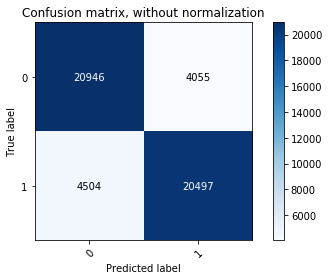

ROC = (array([0.        , 0.16219351, 1.        ]), array([0.        , 0.81984721, 1.        ]), array([2., 1., 0.]))
AUC = 0.828826846926123
Precision = 0.8348403388725969
Recall = 0.8198472061117555
f1_score = 0.8272758460638105


In [22]:
print("BOW + NaiveBayes : ")
print("Confusion Matrix = ") 
plot_confusion_matrix(Y_test, Y_predict)  
print("ROC = " + str( calc_ROC(Y_predict, Y_test)))
print("AUC = " + str(calc_AUC(Y_predict, Y_test)))
print("Precision = " + str(calc_precision(Y_predict, Y_test)))
print("Recall = " + str(calc_recall(Y_predict, Y_test)))
print("f1_score = " + str(calc_f1score(Y_predict, Y_test)))

In [ ]:
Y_predict =  SVM(X_train_BOW, Y_train, X_test_BOW, Y_test)

BOW + NaiveBayes : 
Confusion Matrix = 
Confusion matrix, without normalization
[[20946  4055]
 [ 4504 20497]]


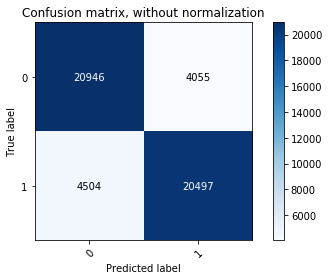

ROC = (array([0.        , 0.16219351, 1.        ]), array([0.        , 0.81984721, 1.        ]), array([2., 1., 0.]))
AUC = nan
Precision = 0.8348403388725969
Recall = 0.8198472061117555
f1_score = 0.8272758460638105


C:\Users\maryam\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [74]:
print("BOW + SVM : ")
print("Confusion Matrix = ") 
plot_confusion_matrix(Y_test, Y_predict)  
print("ROC = " + str( calc_ROC(Y_predict, Y_test)))
print("AUC = " + str(calc_AUC(Y_predict, Y_test)))
print("Precision = " + str(calc_precision(Y_predict, Y_test)))
print("Recall = " + str(calc_recall(Y_predict, Y_test)))
print("f1_score = " + str(calc_f1score(Y_predict, Y_test)))

In [23]:
Y_predict =  decision_tree(X_train_BOW, Y_train, X_test_BOW, Y_test)

BOW + decision_tree : 
Confusion Matrix = 
Confusion matrix, without normalization
[[17862  7139]
 [ 7400 17601]]


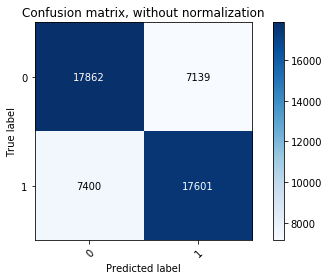

ROC = (array([0.        , 0.28554858, 1.        ]), array([0.        , 0.70401184, 1.        ]), array([2., 1., 0.]))
AUC = 0.7092316307347706
Precision = 0.7114389652384802
Recall = 0.704011839526419
f1_score = 0.7077059166482379


In [24]:
print("BOW + decision_tree : ")
print("Confusion Matrix = ") 
plot_confusion_matrix(Y_test, Y_predict)  
print("ROC = " + str( calc_ROC(Y_predict, Y_test)))
print("AUC = " + str(calc_AUC(Y_predict, Y_test)))
print("Precision = " + str(calc_precision(Y_predict, Y_test)))
print("Recall = " + str(calc_recall(Y_predict, Y_test)))
print("f1_score = " + str(calc_f1score(Y_predict, Y_test)))

In [25]:
Y_predict =  random_forest(X_train_BOW, Y_train, X_test_BOW, Y_test)

C:\Users\maryam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


BOW + random_forest : 
Confusion Matrix = 
Confusion matrix, without normalization
[[20642  4359]
 [ 7214 17787]]


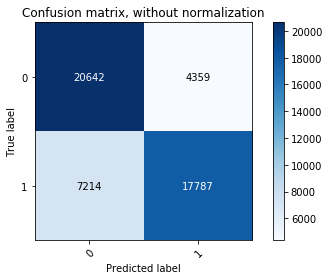

ROC = (array([0.        , 0.17435303, 1.        ]), array([0.        , 0.71145154, 1.        ]), array([2., 1., 0.]))
AUC = 0.7685492580296788
Precision = 0.8031698726632349
Recall = 0.7114515419383225
f1_score = 0.75453369249369


In [26]:
print("BOW + random_forest : ")
print("Confusion Matrix = ") 
plot_confusion_matrix(Y_test, Y_predict)  
print("ROC = " + str( calc_ROC(Y_predict, Y_test)))
print("AUC = " + str(calc_AUC(Y_predict, Y_test)))
print("Precision = " + str(calc_precision(Y_predict, Y_test)))
print("Recall = " + str(calc_recall(Y_predict, Y_test)))
print("f1_score = " + str(calc_f1score(Y_predict, Y_test)))

### Train all classifier for TF_IDF
Now we train all classifiers with the training and test set which is acheived from TF_IDF.

In [31]:
Y_predict =  NaiveBayes(X_train_Tfidf, Y_train, X_train_Tfidf, Y_test)

TF_IDF + NaiveBayes : 
Confusion Matrix = 
Confusion matrix, without normalization
[[21010  3991]
 [ 3526 21475]]


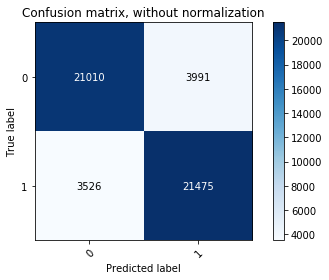

ROC = (array([0.        , 0.15963361, 1.        ]), array([0.        , 0.85896564, 1.        ]), array([2., 1., 0.]))
AUC = 0.8496660133594657
Precision = 0.8432812377287363
Recall = 0.8589656413743451
f1_score = 0.851051181960489


In [32]:
print("TF_IDF + NaiveBayes : ")
print("Confusion Matrix = ") 
plot_confusion_matrix(Y_test, Y_predict)  
print("ROC = " + str( calc_ROC(Y_predict, Y_test)))
print("AUC = " + str(calc_AUC(Y_predict, Y_test)))
print("Precision = " + str(calc_precision(Y_predict, Y_test)))
print("Recall = " + str(calc_recall(Y_predict, Y_test)))
print("f1_score = " + str(calc_f1score(Y_predict, Y_test)))

In [ ]:
Y_predict =  SVM(X_train_Tfidf, Y_train, X_train_Tfidf, Y_test)

In [ ]:
print("TF_IDF + SVM : ")
print("Confusion Matrix = ") 
plot_confusion_matrix(Y_test, Y_predict)  
print("ROC = " + str( calc_ROC(Y_predict, Y_test)))
print("AUC = " + str(calc_AUC(Y_predict, Y_test)))
print("Precision = " + str(calc_precision(Y_predict, Y_test)))
print("Recall = " + str(calc_recall(Y_predict, Y_test)))
print("f1_score = " + str(calc_f1score(Y_predict, Y_test)))

In [33]:
Y_predict =  decision_tree(X_train_Tfidf, Y_train, X_train_Tfidf, Y_test)

TF_IDF + Decision tree : 
Confusion Matrix = 
Confusion matrix, without normalization
[[25001     0]
 [    0 25001]]


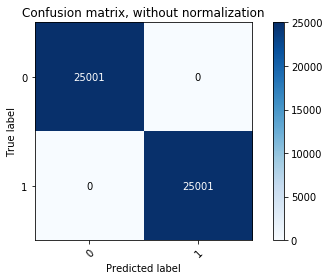

ROC = (array([0., 0., 1.]), array([0., 1., 1.]), array([2., 1., 0.]))
AUC = 1.0
Precision = 1.0
Recall = 1.0
f1_score = 1.0


In [34]:
print("TF_IDF + Decision tree : ")
print("Confusion Matrix = ") 
plot_confusion_matrix(Y_test, Y_predict)  
print("ROC = " + str( calc_ROC(Y_predict, Y_test)))
print("AUC = " + str(calc_AUC(Y_predict, Y_test)))
print("Precision = " + str(calc_precision(Y_predict, Y_test)))
print("Recall = " + str(calc_recall(Y_predict, Y_test)))
print("f1_score = " + str(calc_f1score(Y_predict, Y_test)))

In [35]:
Y_predict =  random_forest(X_train_Tfidf, Y_train, X_train_Tfidf, Y_test)

C:\Users\maryam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


TF_IDF + Random forest : 
Confusion Matrix = 
Confusion matrix, without normalization
[[25001     0]
 [    6 24995]]


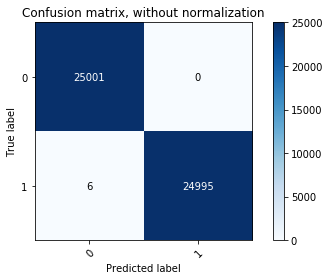

ROC = (array([0., 0., 1.]), array([0.        , 0.99976001, 1.        ]), array([2., 1., 0.]))
AUC = 0.999880004799808
Precision = 1.0
Recall = 0.999760009599616
f1_score = 0.9998799903992319


In [36]:
print("TF_IDF + Random forest : ")
print("Confusion Matrix = ") 
plot_confusion_matrix(Y_test, Y_predict)  
print("ROC = " + str( calc_ROC(Y_predict, Y_test)))
print("AUC = " + str(calc_AUC(Y_predict, Y_test)))
print("Precision = " + str(calc_precision(Y_predict, Y_test)))
print("Recall = " + str(calc_recall(Y_predict, Y_test)))
print("f1_score = " + str(calc_f1score(Y_predict, Y_test)))

### Train all classifier for TF_IDF without stop words
Now we train all classifiers with the training and test set which is acheived from TF_IDF without stop words.

In [47]:
Y_predict =  NaiveBayes(X_train_Tfidfnonstop, Y_train, X_train_Tfidfnonstop, Y_test)

TF_IDF non stop + NaiveBayes : 
Confusion Matrix = 
Confusion matrix, without normalization
[[20968  4033]
 [ 3384 21617]]


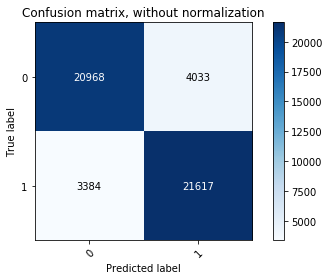

ROC = (array([0.        , 0.16131355, 1.        ]), array([0.        , 0.86464541, 1.        ]), array([2., 1., 0.]))
AUC = 0.8516659333626655
Precision = 0.8427680311890838
Recall = 0.8646454141834327
f1_score = 0.8535665633452449


In [48]:
print("TF_IDF non stop + NaiveBayes : ")
print("Confusion Matrix = ") 
plot_confusion_matrix(Y_test, Y_predict)  
print("ROC = " + str( calc_ROC(Y_predict, Y_test)))
print("AUC = " + str(calc_AUC(Y_predict, Y_test)))
print("Precision = " + str(calc_precision(Y_predict, Y_test)))
print("Recall = " + str(calc_recall(Y_predict, Y_test)))
print("f1_score = " + str(calc_f1score(Y_predict, Y_test)))

In [ ]:
Y_predict =  SVM(X_train_Tfidfnonstop, Y_train, X_train_Tfidfnonstop, Y_test)

In [ ]:
print("TF_IDF non stop + SVM : ")
print("Confusion Matrix = ") 
plot_confusion_matrix(Y_test, Y_predict)  
print("ROC = " + str( calc_ROC(Y_predict, Y_test)))
print("AUC = " + str(calc_AUC(Y_predict, Y_test)))
print("Precision = " + str(calc_precision(Y_predict, Y_test)))
print("Recall = " + str(calc_recall(Y_predict, Y_test)))
print("f1_score = " + str(calc_f1score(Y_predict, Y_test)))

In [49]:
Y_predict =  decision_tree(X_train_Tfidfnonstop, Y_train, X_train_Tfidfnonstop, Y_test)

TF_IDF non stop + Decision Tree : 
Confusion Matrix = 
Confusion matrix, without normalization
[[25001     0]
 [    0 25001]]


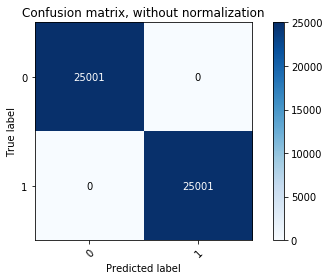

ROC = (array([0., 0., 1.]), array([0., 1., 1.]), array([2., 1., 0.]))
AUC = 1.0
Precision = 1.0
Recall = 1.0
f1_score = 1.0


In [50]:
print("TF_IDF non stop + Decision Tree : ")
print("Confusion Matrix = ") 
plot_confusion_matrix(Y_test, Y_predict)  
print("ROC = " + str( calc_ROC(Y_predict, Y_test)))
print("AUC = " + str(calc_AUC(Y_predict, Y_test)))
print("Precision = " + str(calc_precision(Y_predict, Y_test)))
print("Recall = " + str(calc_recall(Y_predict, Y_test)))
print("f1_score = " + str(calc_f1score(Y_predict, Y_test)))

In [51]:
Y_predict =  random_forest(X_train_Tfidfnonstop, Y_train, X_train_Tfidfnonstop, Y_test)

C:\Users\maryam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


TF_IDF non stop + Random forest : 
Confusion Matrix = 
Confusion matrix, without normalization
[[25001     0]
 [    8 24993]]


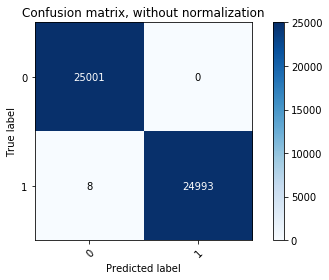

ROC = (array([0., 0., 1.]), array([0.        , 0.99968001, 1.        ]), array([2., 1., 0.]))
AUC = 0.999840006399744
Precision = 1.0
Recall = 0.999680012799488
f1_score = 0.9998399807976958


In [52]:
print("TF_IDF non stop + Random forest : ")
print("Confusion Matrix = ") 
plot_confusion_matrix(Y_test, Y_predict)  
print("ROC = " + str( calc_ROC(Y_predict, Y_test)))
print("AUC = " + str(calc_AUC(Y_predict, Y_test)))
print("Precision = " + str(calc_precision(Y_predict, Y_test)))
print("Recall = " + str(calc_recall(Y_predict, Y_test)))
print("f1_score = " + str(calc_f1score(Y_predict, Y_test)))